## Modal Split in Transportation

In [2]:
import pandas as pd

## Load Data

In [1]:
DATA_REMOTE = "https://raw.githubusercontent.com/datumorphism/dataset-eurostats-freight-modal-split/master/dataset/eurostats_freight_modal_split.csv"

In [3]:
df = pd.read_csv(DATA_REMOTE)

In [4]:
df.head()

,transport_mode,country,year,value,is_estimated,not_applicable
0,inland_waterways,AT,2005,0.033,False,False
1,inland_waterways,BE,2005,0.135,False,False
2,inland_waterways,BG,2005,0.300,True,False
3,inland_waterways,CH,2005,0.001,True,False
4,inland_waterways,CY,2005,NaN,False,True


In [24]:
df.country.unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT',
       'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK',
       'UK'], dtype=object)

## Visualizations

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

### Visualize Time Series

In [57]:
df_road = df.loc[df.transport_mode == 'road']
df_road.sort_values(by=["country", "year", "value"], inplace=True)

<ipython-input-57-fb44bbbfb806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_road.sort_values(by=["country", "year", "value"], inplace=True)


Text(0, 0.5, 'percentage of the total freight in tonne-kilometers')

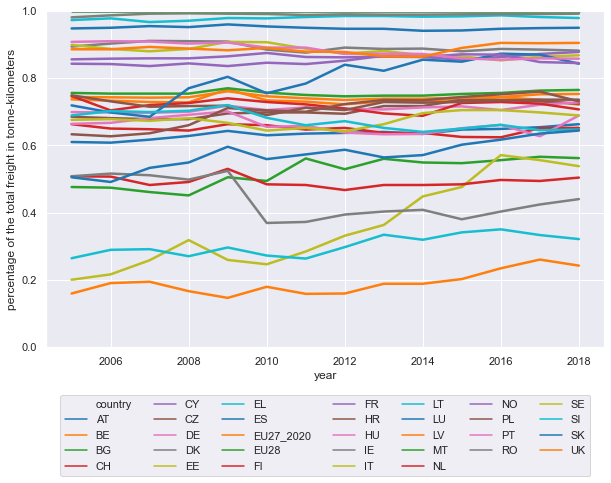

In [58]:
fig, ax = plt.subplots(figsize=(10,6.18))

g = sns.lineplot(
    x="year",
    y="value",
    data=df_road,
    hue='country',
    palette="tab10",
    linewidth=2.5,
    markers='+',
    ax=ax
)
g.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4),ncol=7)
ax.set_ylim([0,1])
ax.set_ylabel('percentage of the total freight in tonne-kilometers')

In [20]:
df_road_eu28 = df_road.loc[df_road.country == "EU28"]

(0.0, 1.0)

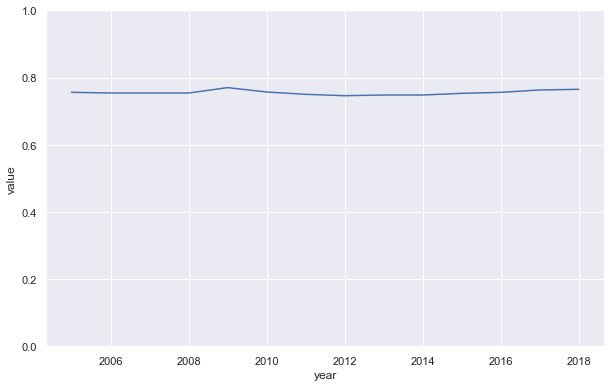

In [26]:
fig, ax = plt.subplots(figsize=(10,6.18))

sns.lineplot(
    x="year",
    y="value",
    data=df_road_eu28,
    ax=ax,
    palette="tab10"
)
ax.set_ylim([0,1])

## Visualize the Ranks of the countries

In [125]:
df_road_pivot = df_road.pivot(index='country', columns='year')['value']
df_road_pivot = df_road_pivot.reset_index()
df_road_pivot.head()

year,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AT,0.610,0.608,0.617,0.628,0.643,0.630,0.635,0.637,0.640,0.634,0.647,0.649,0.654,0.663
1,BE,0.737,0.733,0.729,0.728,0.767,0.734,0.730,0.722,0.731,0.730,0.736,0.743,0.736,0.721
2,BG,0.476,0.474,0.461,0.451,0.505,0.494,0.561,0.529,0.560,0.549,0.547,0.556,0.566,0.562
3,CH,0.663,0.650,0.648,0.644,0.663,0.660,0.647,0.652,0.637,0.637,0.625,0.624,0.651,0.652
4,CY,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


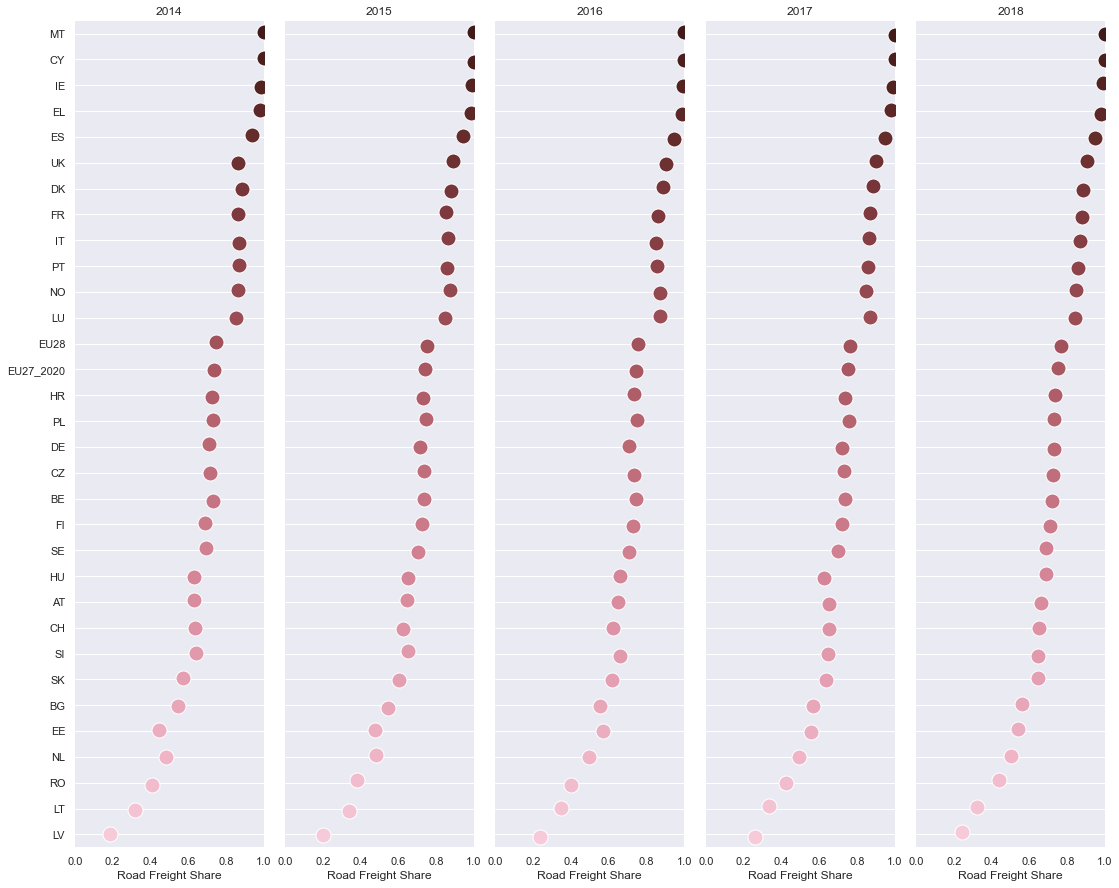

In [142]:
df_road_vis = df_road_pivot[["country",2014,2015,2016,2017,2018]]

# Make the PairGrid
g = sns.PairGrid(
    df_road_vis.sort_values(2018, ascending=False),
    x_vars=df_road_vis.columns[1:], y_vars=["country"],
    height=12, aspect=.25
)

# Draw a dot plot using the stripplot function
g.map(
    sns.stripplot, size=15, orient="h",
    palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w"
)

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 1), xlabel="Road Freight Share", ylabel="")

# Use semantically meaningful titles for the columns
titles = df_road_vis.columns[1:].tolist()

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

Text(0, 0.5, 'Countries')

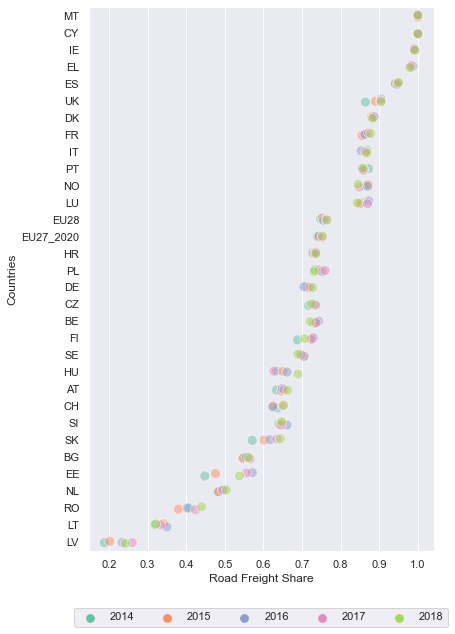

In [175]:
fig, ax=plt.subplots(figsize=(6.18, 10))

df_road_vis_2 = df_road.loc[df.year>=2014]
df_road_vis_2.sort_values("value", ascending=False)

g = sns.stripplot(
    y="country", x="value", hue="year", data=df_road_vis_2, ax=ax, orient="h",
    palette="Set2", size=10, marker="o",
    edgecolor="w", alpha=.5, linewidth=1, 
    order=df_road_vis_2.loc[df_road_vis_2.year==2018].sort_values("value", ascending=False).country.unique()
)
g.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=7)
ax.set_xlabel('Road Freight Share')
ax.set_ylabel('Countries')